<a href="https://colab.research.google.com/github/somyakmukherjee/US-Home-Price-Prediction/blob/main/EDA_%26_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_final = pd.read_csv("ushomepricedataset.csv")

In [3]:
df_final.head()

,DATE,GDP,permit,house_st,target,IPI_Cement,all_Const_Emp,unemployed_rate,MSPUS,PPI_Concrete,...,total_emp_cons,p_saving_rate,new_private_house,new_private_hw_under,emp_pop_ratio,labor_percent,population,home_ow_rate,PPI_Cement,income
0,1987-01-01,4722.156,1690.0,1774.0,63.735,123.7373,722.3,6.6,97900.0,109.3,...,5007.0,9.4,1862.0,1090.0,61.0,65.4,241857.0,63.9,100.1,3820.2
1,1987-02-01,4722.156,1689.0,1784.0,64.134,123.1670,724.2,6.6,97900.0,109.3,...,5038.0,8.2,1771.0,1096.0,61.1,65.5,242005.0,63.9,100.8,3845.0
2,1987-03-01,4722.156,1704.0,1726.0,64.470,122.5706,727.9,6.6,97900.0,109.3,...,5039.0,8.1,1694.0,1084.0,61.2,65.5,242166.0,63.9,101.2,3863.8
3,1987-04-01,4806.160,1601.0,1614.0,64.973,123.5345,728.1,6.3,103400.0,109.3,...,5053.0,4.1,1735.0,1079.0,61.3,65.4,242338.0,63.9,100.8,3875.4
4,1987-05-01,4806.160,1500.0,1628.0,65.547,123.8454,727.6,6.3,103400.0,108.7,...,5080.0,7.8,1713.0,1070.0,61.6,65.7,242516.0,63.9,101.2,3908.6


In [4]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  439 non-null    object 
 1   GDP                   439 non-null    float64
 2   permit                439 non-null    float64
 3   house_st              439 non-null    float64
 4   target                439 non-null    float64
 5   IPI_Cement            439 non-null    float64
 6   all_Const_Emp         439 non-null    float64
 7   unemployed_rate       439 non-null    float64
 8   MSPUS                 439 non-null    float64
 9   PPI_Concrete          439 non-null    float64
 10  monthly_supply        439 non-null    float64
 11  total_emp_cons        439 non-null    float64
 12  p_saving_rate         439 non-null    float64
 13  new_private_house     439 non-null    float64
 14  new_private_hw_under  439 non-null    float64
 15  emp_pop_ratio         4

In [5]:
df_final.describe()

,GDP,permit,house_st,target,IPI_Cement,all_Const_Emp,unemployed_rate,MSPUS,PPI_Concrete,monthly_supply,total_emp_cons,p_saving_rate,new_private_house,new_private_hw_under,emp_pop_ratio,labor_percent,population,home_ow_rate,PPI_Cement,income
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,13236.359105,1355.164009,1337.020501,141.148872,119.565469,742.157631,5.776993,219945.558087,179.159756,5.900000,6288.307517,6.331891,1301.466970,954.018223,61.353531,65.113440,293349.423690,65.777221,176.835043,11171.796355
std,5902.180528,390.759196,379.076753,60.300204,23.911065,123.747671,1.676957,90045.171678,51.907865,1.740991,959.538073,2.887824,353.450626,289.464053,2.067575,1.786754,28737.180981,1.744104,57.245852,5197.451181
min,4722.156000,513.000000,478.000000,63.735000,66.350800,542.600000,3.400000,97900.000000,108.700000,3.300000,4570.000000,1.400000,520.000000,414.000000,51.300000,60.100000,241857.000000,63.100000,100.100000,3820.200000
25%,7868.468000,1089.500000,1103.000000,81.733000,101.180200,633.150000,4.600000,138000.000000,141.400000,4.500000,5424.500000,4.900000,1088.500000,760.000000,59.750000,63.100000,268602.000000,64.100000,129.200000,6539.100000
50%,12922.656000,1381.000000,1377.000000,141.048000,116.904800,734.300000,5.400000,219000.000000,163.200000,5.600000,6402.000000,6.100000,1333.000000,973.000000,61.900000,66.000000,295359.000000,65.500000,171.800000,10464.100000
75%,17518.508000,1624.000000,1582.500000,178.936000,139.426100,826.250000,6.600000,281000.000000,207.000000,6.800000,7092.000000,7.450000,1546.000000,1123.000000,62.900000,66.500000,319331.500000,67.400000,210.050000,14724.800000
max,27610.128000,2263.000000,2273.000000,310.146000,192.032200,1022.000000,14.700000,479500.000000,336.455000,12.200000,7967.000000,32.000000,2245.000000,1710.000000,64.700000,67.300000,335329.000000,69.400000,331.468000,24471.800000


In [6]:
df_final.isna().sum()

DATE                    0
GDP                     0
permit                  0
house_st                0
target                  0
IPI_Cement              0
all_Const_Emp           0
unemployed_rate         0
MSPUS                   0
PPI_Concrete            0
monthly_supply          0
total_emp_cons          0
p_saving_rate           0
new_private_house       0
new_private_hw_under    0
emp_pop_ratio           0
labor_percent           0
population              0
home_ow_rate            0
PPI_Cement              0
income                  0
dtype: int64

## **Histograms and Kernel Density Plots**

In [7]:
factors = df_final.columns

<Figure size 2200x1200 with 0 Axes>

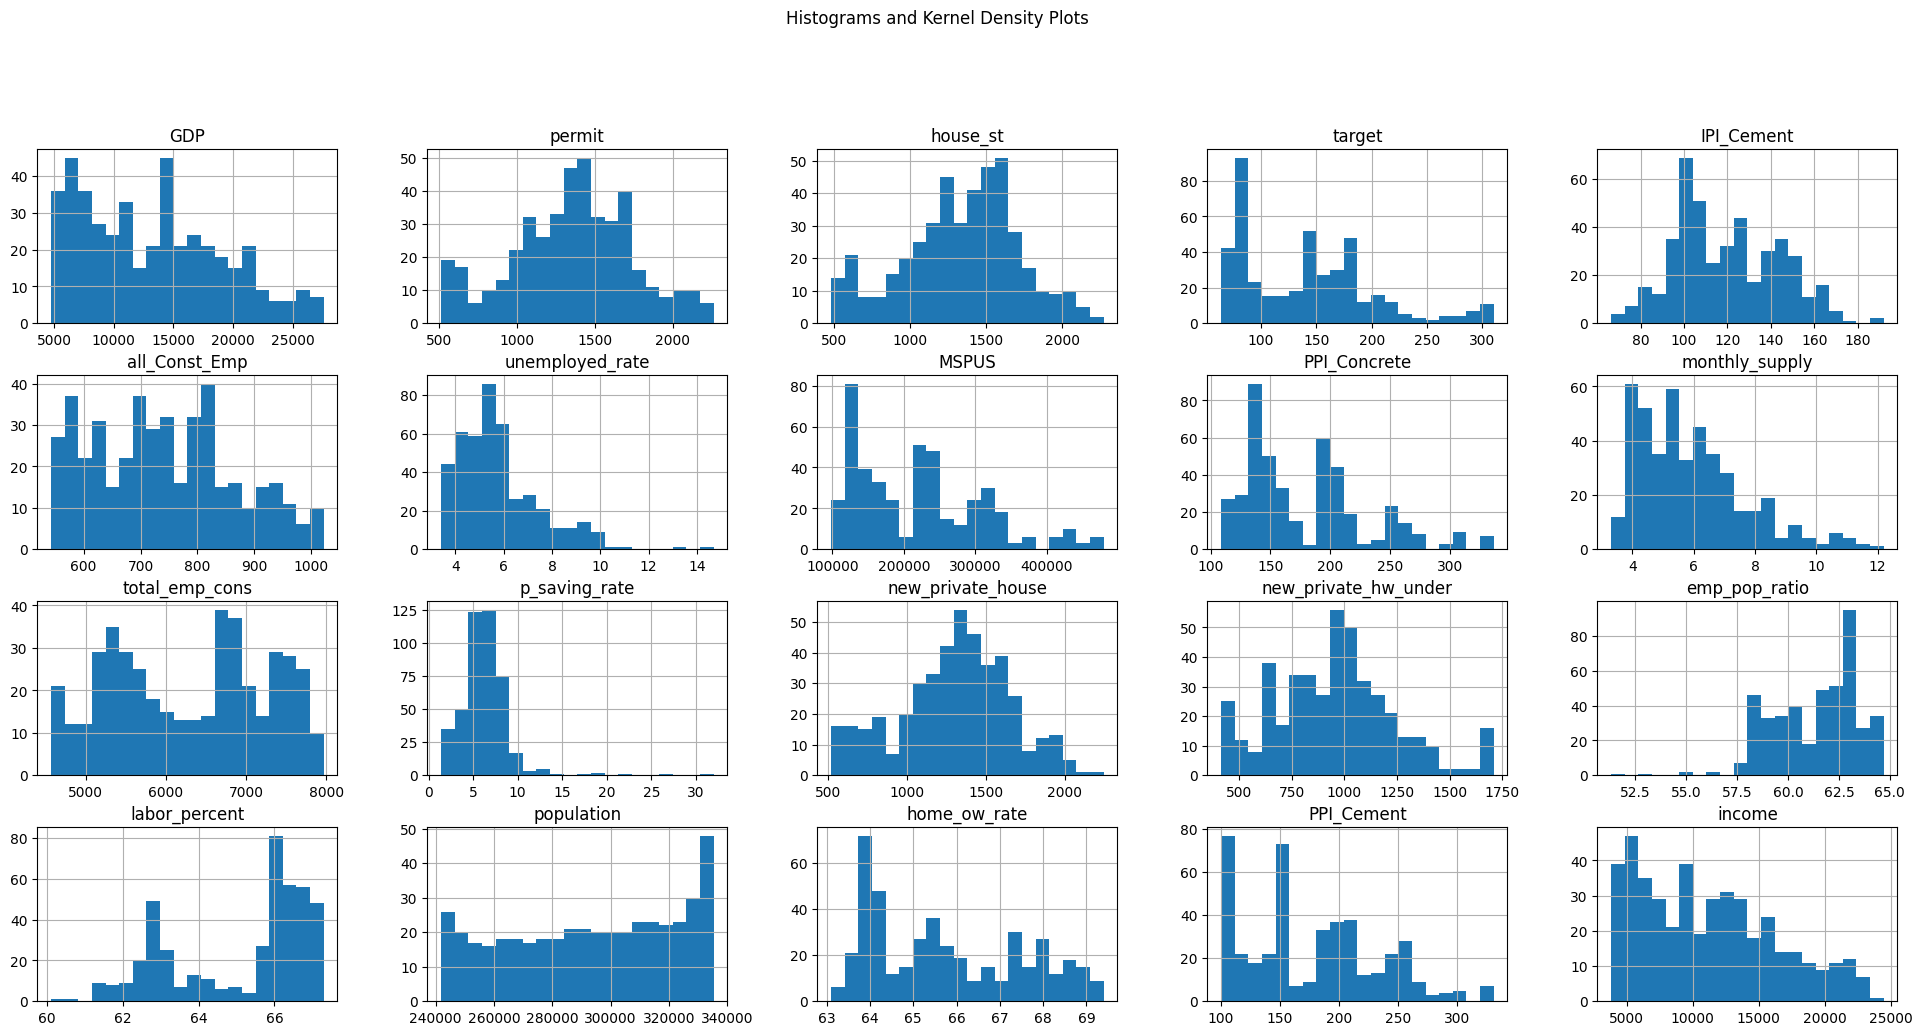

In [8]:
#Plotting Histograms and Kernel Density Plots
plt.figure(figsize=(22, 12))
df_final[factors].hist(bins=20, alpha=1, layout=(5, 5), figsize=(24, 14))
plt.suptitle('Histograms and Kernel Density Plots')
plt.show()

In [9]:
df_final.columns

Index(['DATE', 'GDP', 'permit', 'house_st', 'target', 'IPI_Cement',
       'all_Const_Emp', 'unemployed_rate', 'MSPUS', 'PPI_Concrete',
       'monthly_supply', 'total_emp_cons', 'p_saving_rate',
       'new_private_house', 'new_private_hw_under', 'emp_pop_ratio',
       'labor_percent', 'population', 'home_ow_rate', 'PPI_Cement', 'income'],
      dtype='object')

In [10]:
cols = ['GDP', 'permit', 'house_st', 'target', 'IPI_Cement',
       'all_Const_Emp', 'unemployed_rate', 'MSPUS', 'PPI_Concrete',
       'monthly_supply', 'total_emp_cons', 'p_saving_rate',
       'new_private_house', 'new_private_hw_under', 'emp_pop_ratio',
       'labor_percent', 'population', 'home_ow_rate', 'PPI_Cement', 'income']

<Figure size 1200x600 with 0 Axes>

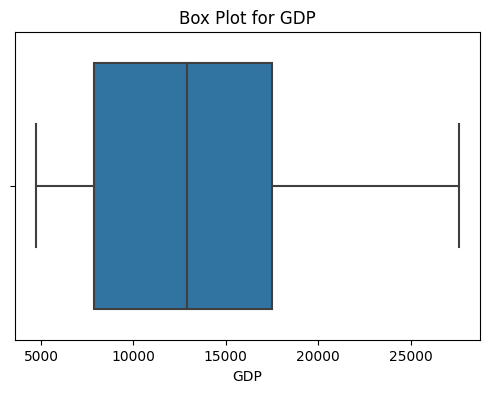

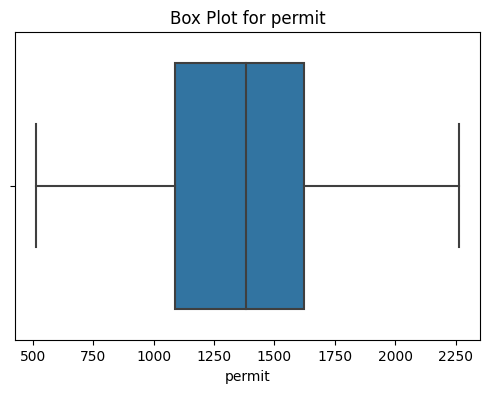

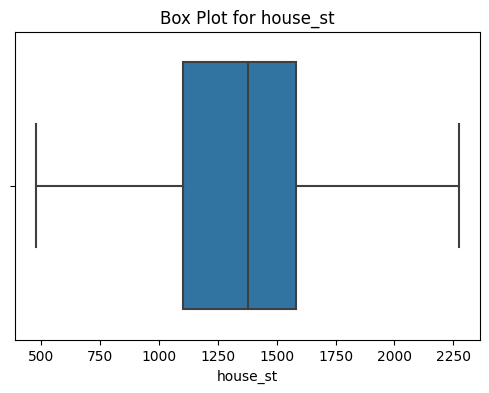

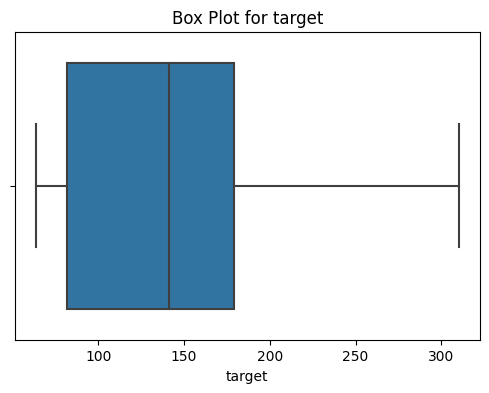

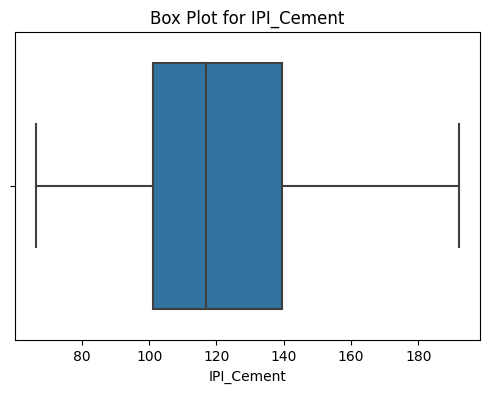

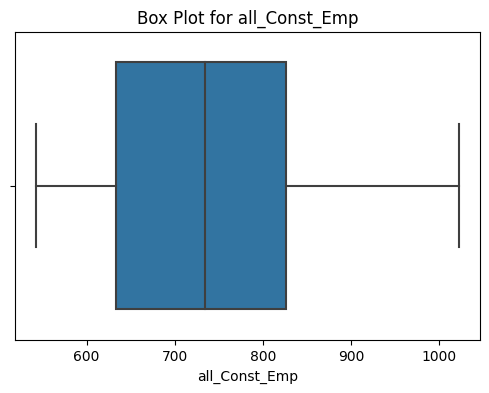

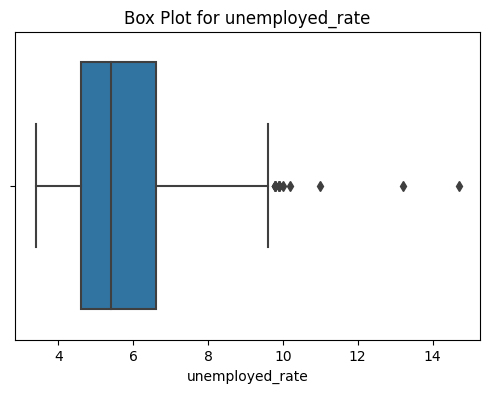

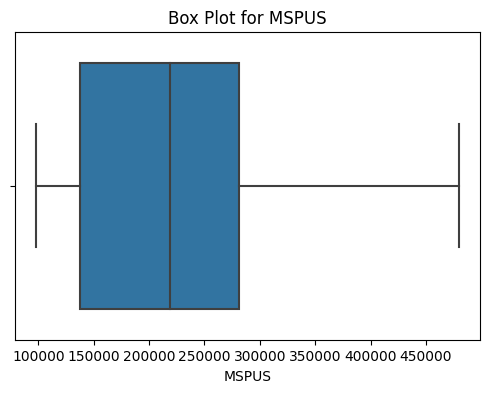

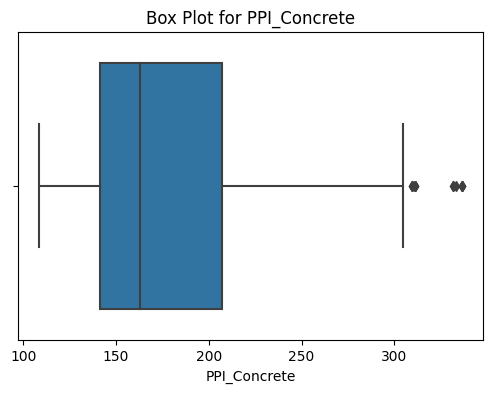

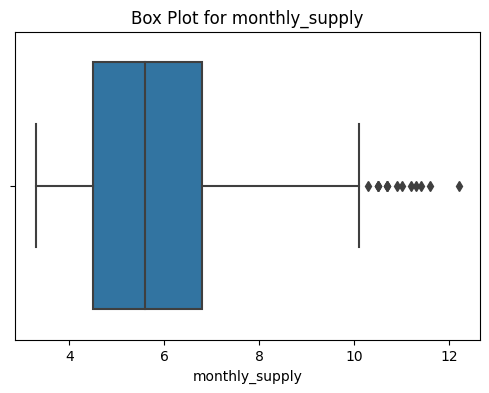

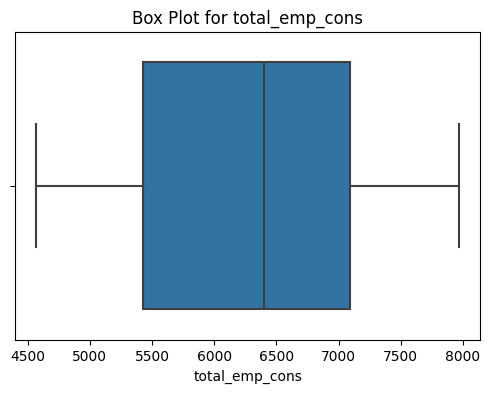

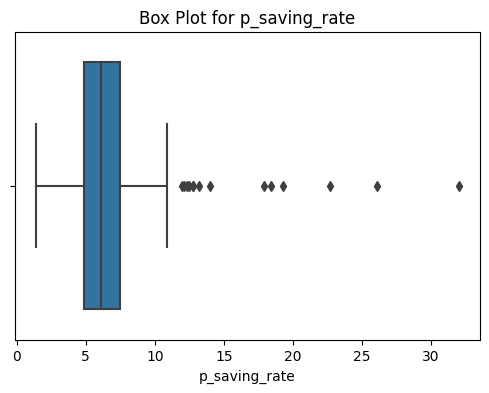

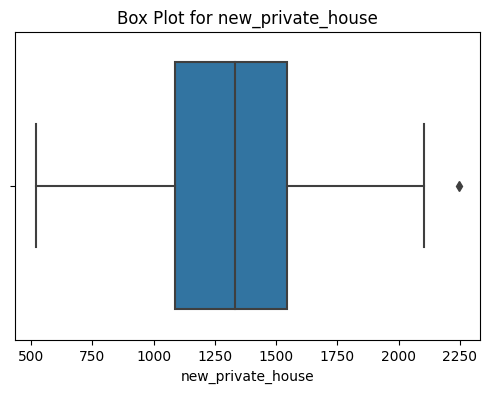

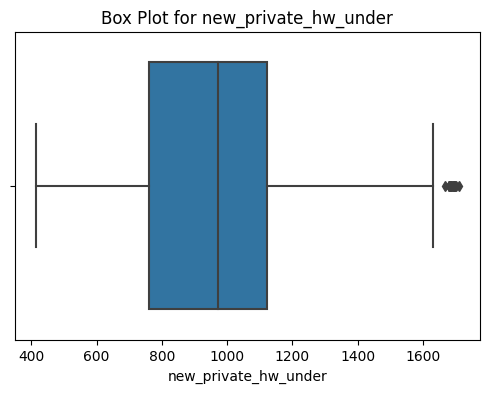

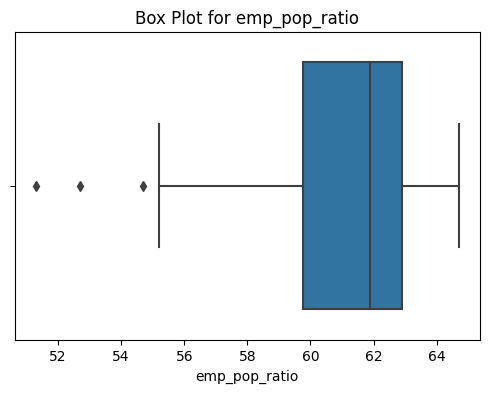

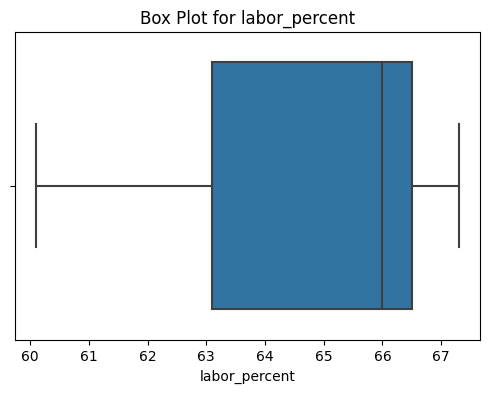

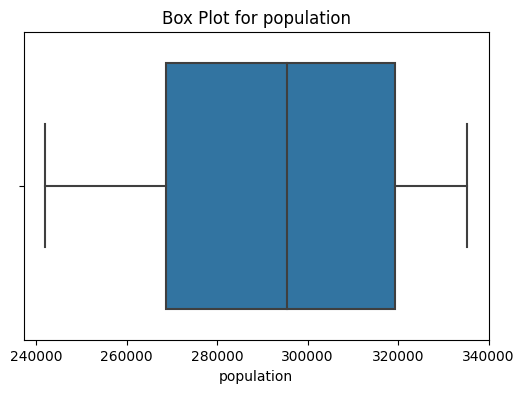

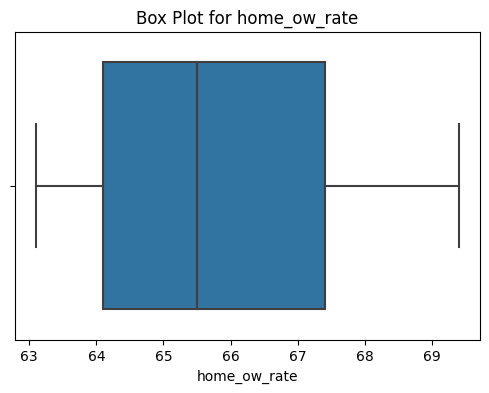

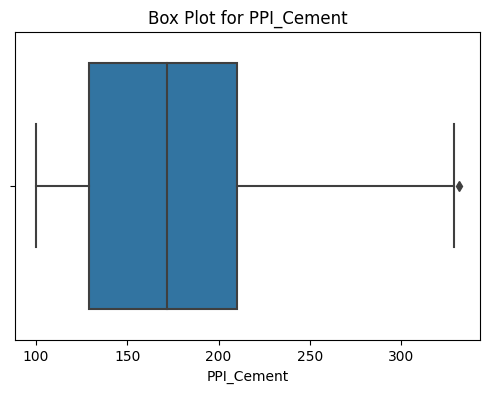

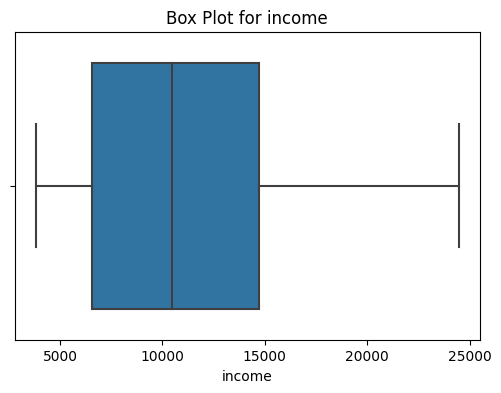

In [11]:
plt.figure(figsize=(12, 6))
for col in cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_final, x=col)
    plt.xlabel(f"{col}")
    plt.title(f'Box Plot for {col}')
    plt.show()

From the above boxplot, we can say that we have outliers in few features:

1. p_saving_rate
2. PPI_Concrete
3. new_private_house
4. emp_pop_ratio
5. new_private_hw_under
6. monthly_supply
7. unemployed_rate

## **Treating Skewness and Outliers:**

### **p_saving_rate**

In [12]:
df_final['p_saving_rate'].skew()

3.314219715024601

Personal saving rate column is highly right skewed. Hence we will apply IQR method for handling outliers.

In [13]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["p_saving_rate"].quantile(0.25)
q2 = df_final["p_saving_rate"].quantile(0.75)

IQR =q2-q1

lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

1.0750000000000006
11.275


In [14]:
# capping the features to upper boundry only.
df_final.loc[df_final['p_saving_rate'] >=upper_bridge,'p_saving_rate'] = upper_bridge

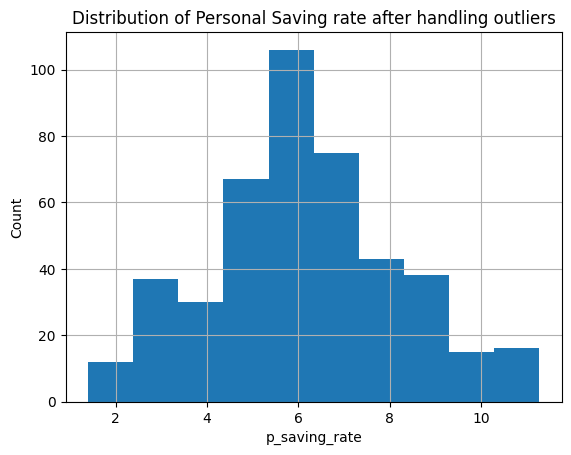

In [15]:
#Distribution of Personal Saving rate after handling outliers
df_final['p_saving_rate'].hist()
plt.title("Distribution of Personal Saving rate after handling outliers")
plt.xlabel("p_saving_rate")
plt.ylabel("Count")
plt.show()

### **PPI_Concrete**

In [16]:
df_final['PPI_Concrete'].skew()

0.9333165648577373

Producer price index of concrete column is highly right skewed. Hence we will apply Log transformation for handling skewness first.

<Axes: >

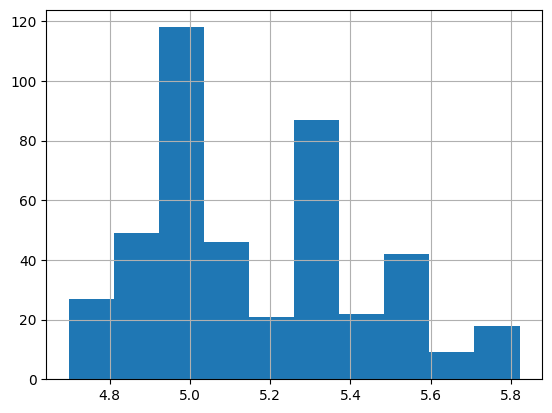

In [17]:
#Applying log transformation & plotting it in histogram
df_final['PPI_Concrete'] = np.log1p(df_final['PPI_Concrete'])
df_final['PPI_Concrete'].hist()

Hence, we can see that skewness and outliers both removed by using log transformation.

In [18]:
df_final['new_private_house'].skew()

-0.21940615301839025

New private house completely constructed units- column is negatively skewed and having outliers in the maximum side. We are going to apply Yeo-Johnson Power Transformation for removing skewness.

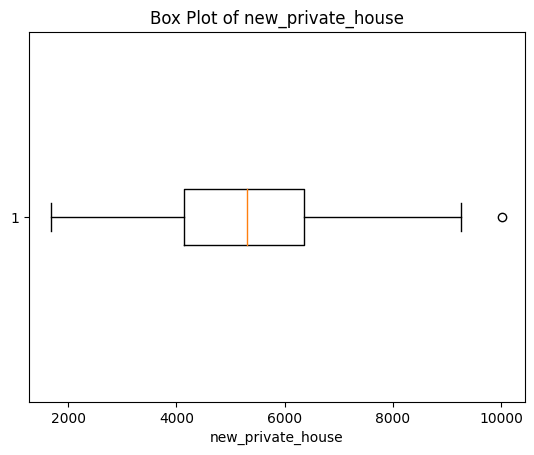

In [19]:
from scipy import stats

transformed_data, lambda_value = stats.yeojohnson(df_final['new_private_house'])
df_final['new_private_house'] = transformed_data

plt.boxplot(df_final['new_private_house'], vert=False)
plt.xlabel('new_private_house')
plt.title('Box Plot of new_private_house')
plt.show()

In [20]:
max_value = df_final['new_private_house'].max()

df_final['new_private_house'] = np.where(df_final['new_private_house'] > max_value, max_value, df_final['new_private_house'])

### **Employment population ratio**

In [21]:
df_final['emp_pop_ratio'].skew()

-0.7538612695782946

Employment population ratio column is negatively skewed and having outliers in the minimum side. We are going to apply IQR method for handling outliers.

In [22]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["emp_pop_ratio"].quantile(0.25)
q2 = df_final["emp_pop_ratio"].quantile(0.75)

IQR =q2-q1

lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

55.025000000000006
67.625


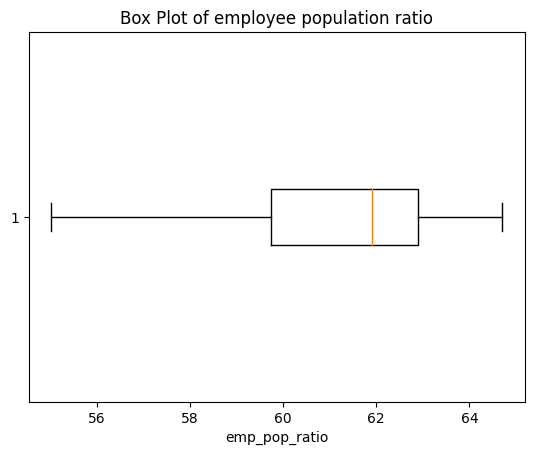

In [23]:
df_final.loc[df_final['emp_pop_ratio'] <=lower_bridge,'emp_pop_ratio'] = lower_bridge

plt.boxplot(df_final['emp_pop_ratio'], vert=False)
plt.xlabel('emp_pop_ratio')
plt.title('Box Plot of employee population ratio')
plt.show()


### **New private house units under contruction**

In [24]:
df_final['new_private_hw_under'].skew()

0.36887282115041053

New private house units under contruction column is right skewed. We will apply IQR Method to deal with the outliers.

In [25]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["new_private_hw_under"].quantile(0.25)
q2 = df_final["new_private_hw_under"].quantile(0.75)

IQR =q2-q1


lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

215.5
1667.5


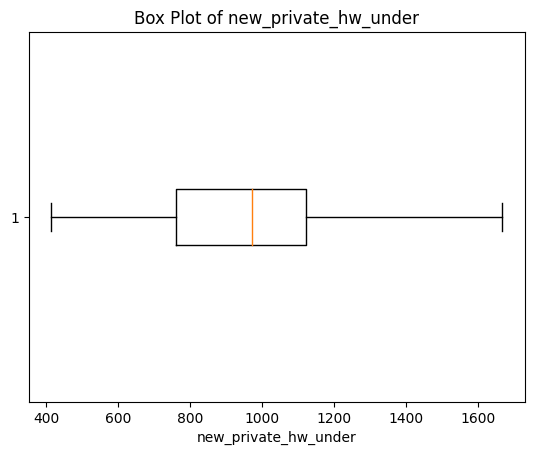

In [26]:
df_final.loc[df_final['new_private_hw_under'] >=upper_bridge,'new_private_hw_under'] = upper_bridge

plt.boxplot(df_final['new_private_hw_under'], vert=False)
plt.xlabel('new_private_hw_under')
plt.title('Box Plot of new_private_hw_under')
plt.show()

### **Monthly supply of houses**

In [27]:
df_final['monthly_supply'].skew()

0.9999105335387007

Monthly supply of houses column is right skewed. We will apply IQR Method to deal with the outliers.

In [28]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["monthly_supply"].quantile(0.25)
q2 = df_final["monthly_supply"].quantile(0.75)

IQR =q2-q1


lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

1.0500000000000003
10.25


<Axes: >

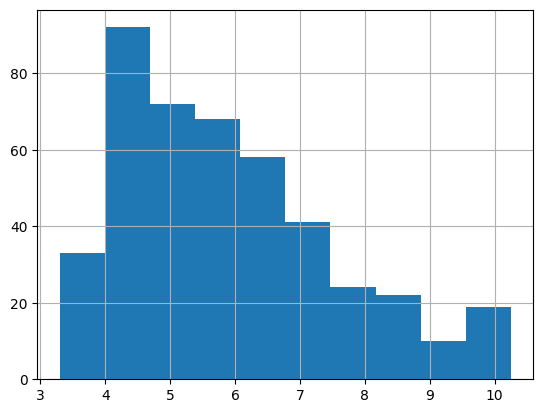

In [29]:
df_final.loc[df_final['monthly_supply'] >=upper_bridge,'monthly_supply'] = upper_bridge
df_final['monthly_supply'].hist()

### **Unemployment Rate**

In [30]:
df_final['unemployed_rate'].skew()

1.2751925262720107

Unemployment rate column is right skewed. We will apply IQR Method to deal with the outliers.

In [31]:
#finding the Q1(25 percentile) and Q3(75 percentile)
q1 = df_final["unemployed_rate"].quantile(0.25)
q2 = df_final["unemployed_rate"].quantile(0.75)

IQR =q2-q1

lower_bridge=q1-(IQR*1.5)
upper_bridge=q2+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

1.5999999999999996
9.6


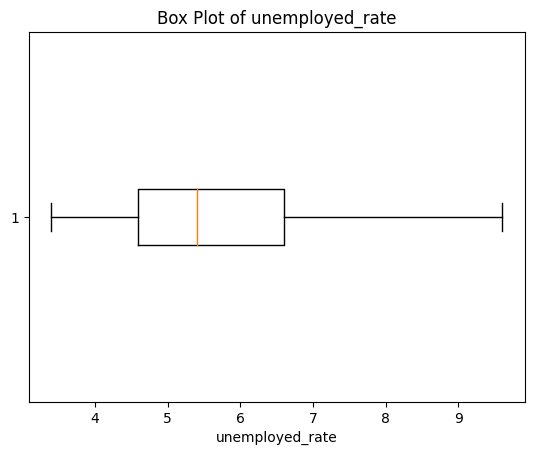

In [32]:
df_final.loc[df_final['unemployed_rate'] >=upper_bridge,'unemployed_rate'] = upper_bridge

plt.boxplot(df_final['unemployed_rate'], vert=False)
plt.xlabel('unemployed_rate')
plt.title('Box Plot of unemployed_rate')
plt.show()

### **Correlation Analysis:**
Calculate the correlation matrix to measure the linear relationships between variables.

In [33]:
# Correlation matrix
corr_matrix = df_final.corr()
corr_matrix

<ipython-input-33-9c3e75f219bf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_final.corr()


,GDP,permit,house_st,target,IPI_Cement,all_Const_Emp,unemployed_rate,MSPUS,PPI_Concrete,monthly_supply,total_emp_cons,p_saving_rate,new_private_house,new_private_hw_under,emp_pop_ratio,labor_percent,population,home_ow_rate,PPI_Cement,income
GDP,1.000000,-0.038685,-0.172308,0.960635,-0.414529,0.375668,-0.162737,0.984782,0.987635,0.101943,0.729086,-0.208754,-0.274425,0.453368,-0.649546,-0.868236,0.968806,0.090379,0.986673,0.996099
permit,-0.038685,1.000000,0.972313,0.127183,0.745594,0.740357,-0.634280,0.059115,-0.128779,-0.497215,0.471157,-0.291252,0.889073,0.743859,0.493668,0.198774,-0.088916,0.386116,-0.028218,-0.038575
house_st,-0.172308,0.972313,1.000000,-0.001751,0.779613,0.670329,-0.621261,-0.072525,-0.256612,-0.481463,0.353387,-0.244733,0.914480,0.682853,0.579290,0.309330,-0.229838,0.330636,-0.157382,-0.172198
target,0.960635,0.127183,-0.001751,1.000000,-0.260801,0.560485,-0.249202,0.980144,0.939075,0.169860,0.812144,-0.285465,-0.068473,0.634922,-0.538779,-0.788312,0.896990,0.207315,0.964082,0.955594
IPI_Cement,-0.414529,0.745594,0.779613,-0.260801,1.000000,0.571652,-0.473677,-0.353461,-0.484453,-0.330392,0.257450,-0.441446,0.834604,0.386060,0.774018,0.627044,-0.373293,0.544918,-0.372857,-0.426624
all_Const_Emp,0.375668,0.740357,0.670329,0.560485,0.571652,1.000000,-0.664328,0.451018,0.291331,-0.021947,0.867393,-0.539569,0.724477,0.911360,0.272765,-0.078682,0.319266,0.568967,0.434454,0.364055
unemployed_rate,-0.162737,-0.634280,-0.621261,-0.249202,-0.473677,-0.664328,1.000000,-0.235603,-0.088911,0.130059,-0.556347,0.362593,-0.588822,-0.714483,-0.540828,-0.037750,-0.069665,0.010187,-0.206730,-0.141901
MSPUS,0.984782,0.059115,-0.072525,0.980144,-0.353461,0.451018,-0.235603,1.000000,0.962709,0.109717,0.750712,-0.227442,-0.178050,0.555198,-0.606754,-0.861546,0.928428,0.081754,0.972505,0.980796
PPI_Concrete,0.987635,-0.128779,-0.256612,0.939075,-0.484453,0.291331,-0.088911,0.962709,1.000000,0.154056,0.669943,-0.160550,-0.351442,0.377790,-0.678273,-0.857081,0.958851,0.067125,0.978483,0.986196
monthly_supply,0.101943,-0.497215,-0.481463,0.169860,-0.330392,-0.021947,0.130059,0.109717,0.154056,1.000000,-0.019091,-0.049211,-0.267583,-0.015187,-0.138872,-0.079672,0.018742,-0.090798,0.167020,0.087918


In [34]:
corr_matrix= df_final.corr()
corr_matrix['target'].sort_values(ascending=False)

<ipython-input-34-deba906ade21>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= df_final.corr()


target                  1.000000
MSPUS                   0.980144
PPI_Cement              0.964082
GDP                     0.960635
income                  0.955594
PPI_Concrete            0.939075
population              0.896990
total_emp_cons          0.812144
new_private_hw_under    0.634922
all_Const_Emp           0.560485
home_ow_rate            0.207315
monthly_supply          0.169860
permit                  0.127183
house_st               -0.001751
new_private_house      -0.068473
unemployed_rate        -0.249202
IPI_Cement             -0.260801
p_saving_rate          -0.285465
emp_pop_ratio          -0.538779
labor_percent          -0.788312
Name: target, dtype: float64

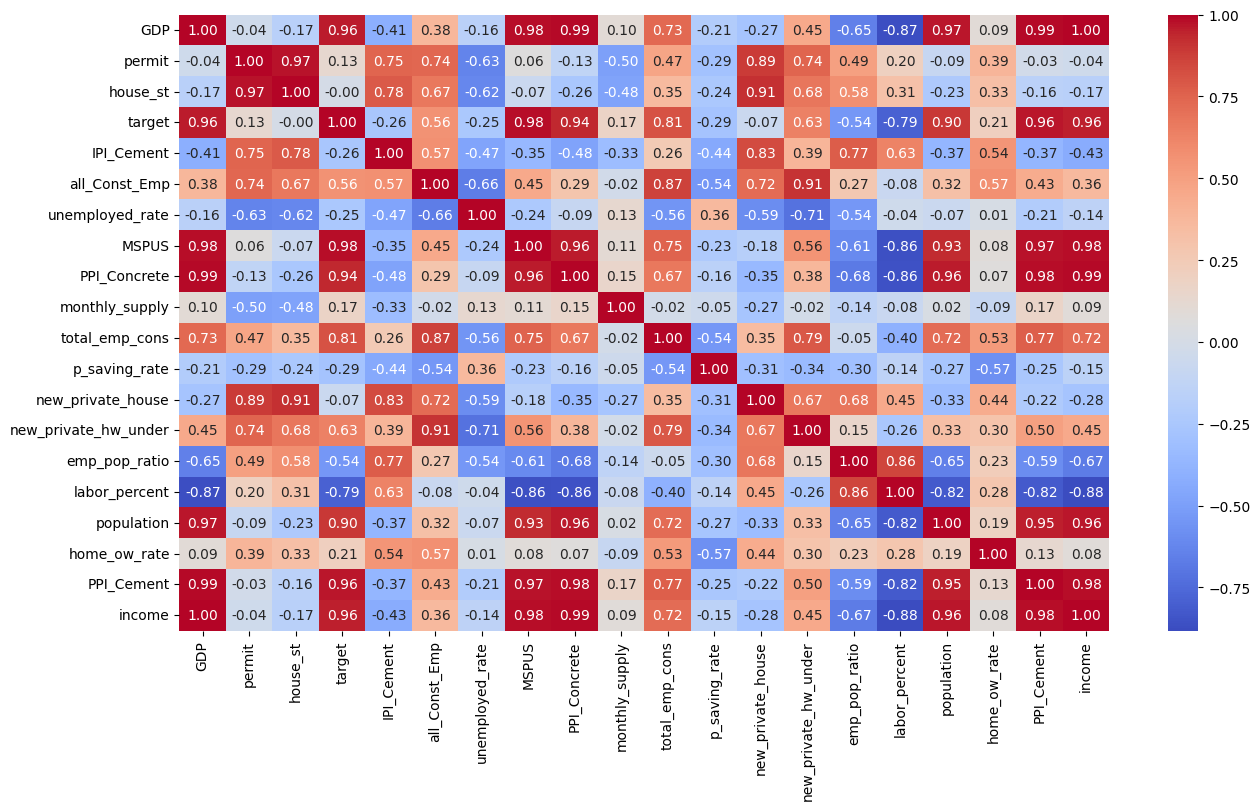

In [35]:
# Visualize correlations using a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [37]:
df_final.to_csv("df_final.csv")
from google.colab import files
files.download('df_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Model Training**

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [41]:
dfc = pd.read_csv("df_final.csv")

In [42]:
dfc.head()

,Unnamed: 0,DATE,GDP,permit,house_st,target,IPI_Cement,all_Const_Emp,unemployed_rate,MSPUS,...,total_emp_cons,p_saving_rate,new_private_house,new_private_hw_under,emp_pop_ratio,labor_percent,population,home_ow_rate,PPI_Cement,income
0,0,1987-01-01,4722.156,1690.0,1774.0,63.735,123.7373,722.3,6.6,97900.0,...,5007.0,9.4,7974.739004,1090.0,61.0,65.4,241857.0,63.9,100.1,3820.2
1,1,1987-02-01,4722.156,1689.0,1784.0,64.134,123.1670,724.2,6.6,97900.0,...,5038.0,8.2,7502.244305,1096.0,61.1,65.5,242005.0,63.9,100.8,3845.0
2,2,1987-03-01,4722.156,1704.0,1726.0,64.470,122.5706,727.9,6.6,97900.0,...,5039.0,8.1,7106.570176,1084.0,61.2,65.5,242166.0,63.9,101.2,3863.8
3,3,1987-04-01,4806.160,1601.0,1614.0,64.973,123.5345,728.1,6.3,103400.0,...,5053.0,4.1,7316.773819,1079.0,61.3,65.4,242338.0,63.9,100.8,3875.4
4,4,1987-05-01,4806.160,1500.0,1628.0,65.547,123.8454,727.6,6.3,103400.0,...,5080.0,7.8,7203.844501,1070.0,61.6,65.7,242516.0,63.9,101.2,3908.6


In [43]:
df = dfc.copy()

## **Data splitting and Scaling**

In [45]:
X = df.drop(columns=['DATE', 'target'], axis=1)
y = df.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100),cv=5, max_iter=10000, tol=0.001)
lasso_cv_model.fit(X_train, y_train)


lasso_cv_predictions = lasso_cv_model.predict(X_test)
optimal_alpha = lasso_cv_model.alpha_


mse = mean_squared_error(y_test, lasso_cv_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_cv_predictions)


print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.0072
Mean Squared Error (MSE): 16.45
RMSE: 4.055543
R-squared (R2): 1.00


In [54]:
cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

Cross-Validation R-squared Scores:
[0.99267764 0.99494067 0.99440042 0.99189969 0.99485665]


In [55]:
mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean R-squared: 0.9938
Standard Deviation of R-squared: 0.0012


In [56]:
print(0.1 * rmse)
print(0.1 * df['target'].mean()) # rmse should be less than the 10% of mean of target variable

0.4055542799443999
14.114887243735765


### **Most Prominent features and least prominent features**

In [57]:
# coefficients and corresponding feature names
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [58]:
non_zero_coefficients_df

,Feature,Coefficient
0,Unnamed: 0,62.106581
1,GDP,23.391007
2,permit,-0.645966
3,house_st,0.210314
4,IPI_Cement,2.590413
5,all_Const_Emp,16.729425
6,unemployed_rate,4.999021
7,MSPUS,20.470718
8,PPI_Concrete,14.134875
9,monthly_supply,2.803244


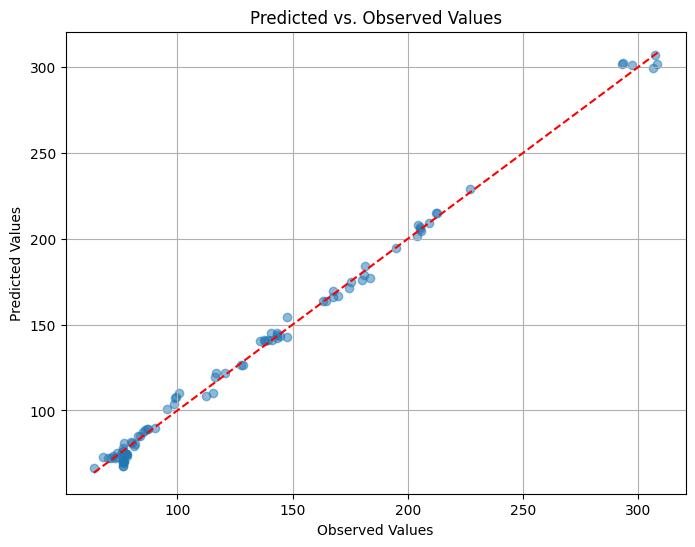

In [60]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()